## 네이버 영화평 감성 분석(https://wikidocs.net/44249)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_df = pd.read_csv('../00.data/NaverMovie/ratings_train.txt', sep='\t')
test_df = pd.read_csv('../00.data/NaverMovie/ratings_test.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [10]:
train_df.shape, test_df.shape
#15만개, 5만개

((150000, 3), (50000, 3))

### 데이터 전처리

In [9]:
#중복있는지 확인
train_df['document'].nunique(), train_df['label'].nunique()
#결과값:146182,2 (4천건정도중복인듯)

(146182, 2)

In [11]:
# document 열에서 중복인 내용이 있다면 중복 제거
train_df.drop_duplicates(subset=['document'], inplace=True) 
train_df.shape
#중복제거했는데도 146182>146183로 1차이나는것은.. 널값이 있어서이다!

(146183, 3)

<AxesSubplot:>

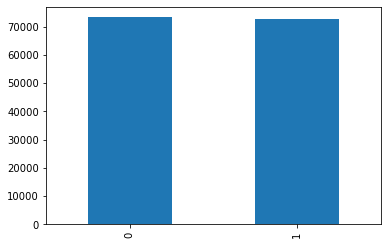

In [12]:
# 긍정, 부정 레이블 값의 분포
train_df.label.value_counts().plot(kind='bar')
#비슷하게 숫자를 맞춰줌?

In [13]:
train_df.label.value_counts()

0    73342
1    72841
Name: label, dtype: int64

In [16]:
# null값확인
train_df.isnull().sum()
#document에 한개 널값이있다!

id          0
document    1
label       0
dtype: int64

In [17]:
#널값위치찾기(행찾기)
train_df.loc[train_df.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [18]:
train_df = train_df.dropna(how = 'any') # Null 값이 존재하는 행제거
train_df.isnull().sum()  # Null 값이 존재하는지 확인/ 또는 train_data.isnull().values.any()

id          0
document    0
label       0
dtype: int64

- 테스트셋도 전처리

In [19]:
test_df['document'].nunique()

49157

In [20]:
# document 열에서 중복인 내용이 있다면 중복제거
test_df.drop_duplicates(subset=['document'], inplace=True) 
test_df.shape

(49158, 3)

In [21]:
test_df = test_df.dropna(how = 'any') # Null 값이 존재하는 행제거
test_df.shape  # Null 값이 존재하는지 확인/ 또는 train_data.isnull().values.any()

(49157, 3)

### 텍스트 전처리

In [22]:
train_df['document'] = train_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] 맨끝공백까지
train_df.head()
#공백. 즉, 띄어쓰기는 유지되면서 온점과 같은 구두점 등은 제거됨

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [23]:
train_df['document'].replace('', np.nan, inplace=True) #아무것도없는데이터''
train_df.isnull().sum()
#391건이 영어거나, 구두점만있거나, 공백일것이다. 이것도지우자!!!

id            0
document    391
label         0
dtype: int64

In [24]:
train_df = train_df.dropna(how = 'any') # Null 값이 존재하는 행제거(널값제거)
train_df.shape 

(145791, 3)

- 테스트데이터셋에도 적용

In [25]:
test_df['document'] = test_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_df['document'].replace('', np.nan, inplace=True) #아무것도없는데이터''
test_df.isnull().sum()
#162건 영어거나, 구두점만있거나, 공백일것이다. 이것도지우자!!!

id            0
document    162
label         0
dtype: int64

In [26]:
test_df = test_df.dropna(how = 'any') # Null 값이 존재하는 행제거(널값제거)
test_df.shape 

(48995, 3)

In [75]:
#열심히 전처리한것 저장하기
train_df.to_csv('../00.data/NaverMovie/train.tsv', sep='\t')
test_df.to_csv('../00.data/NaverMovie/test.tsv', sep='\t')

### 토큰화 BoW
한글은 1)토큰화tokenizer를해서 넣어주던지
벡토라이저를부를때 tokenizer를 부르던지

In [28]:
from konlpy.tag import Okt #형태소분석기
okt = Okt()

In [32]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '를']

In [30]:
# 한줄한줄데이터들어가서 토큰화(리스트만들어짐)/ 형태소분석기morphs
okt.morphs('교도소 이야기구먼 솔직히 재미는 없다평점 조정')

['교도소', '이야기', '구먼', '솔직히', '재미', '는', '없다', '평점', '조정']

In [31]:
okt.morphs('교도소 이야기구먼 솔직히 재미는 없다평점 조정', stem=True)
#'stem=True 어근을표시하라' 솔직히>솔직하다로 바뀜

['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', '평점', '조정']

In [34]:
from tqdm import tqdm_notebook
#시간이엄청오래걸려서.... 9분정도소요됨
X_train = []
for sentence in tqdm_notebook(train_df['document']):
    morphs = okt.morphs(sentence, stem=True) # 한줄한줄데이터들어가서 토큰화(리스트만들어짐)/ 형태소분석기morphs
    temp_X = ' '.join([word for word in morphs if not word in stopwords]) # 불용어 제거
    X_train.append(temp_X)
#형태소분석을한다음에 한칸띄기 문장으로 출력... 카운터벡터라이져쓸꺼니까

In [35]:
X_test = []
for sentence in tqdm_notebook(test_df['document']):
    morphs = okt.morphs(sentence, stem=True) # 한줄한줄데이터들어가서 토큰화(리스트만들어짐)/ 형태소분석기morphs
    temp_X = ' '.join([word for word in morphs if not word in stopwords]) # 불용어 제거
    X_test.append(temp_X)
#4분소요

In [36]:
#y_train도만들어보자! label컬럼으로!
y_train = train_df.label.values
y_test = test_df.label.values

### CountVectorizer, LogisticRegression

In [37]:
X_train[0] #문자열을 벡터라이저 숫자로 바꿔줘야함!!

'아 더빙 진짜 짜증나다 목소리'

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
cvecter = CountVectorizer()
cvecter.fit(X_train)
X_train_cvect = cvecter.transform(X_train)
X_test_cvect = cvecter.transform(X_test)
#문자열을 숫자로 변환

In [41]:
X_train_cvect[0]

<1x42118 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [42]:
# 분류기만들기
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cvect, y_train)
pred = lr_clf.predict(X_test_cvect)
accuracy_score(y_test, pred)
#정확도 0.8261 맞췄다....

0.8261659352995203

### 실제 테스트

In [47]:
review1 = '진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ'
review2 = '이런 사랑영화가 다시 나올 수 있을까?'

In [51]:
#전처리
import re
review1 = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", review1)
review1
#... 특수기호삭제

'진짜 개노잼이다 편이랑 같은 감독맞나러닝타임도 길어서 개지루함 ㄹㅇ'

In [58]:
#토큰화
morphs = okt.morphs(review1)
review = ' '.join([word for word in morphs if not word in stopwords]) # 불용어 제거
review

'진짜 개 노잼 이다 편이 랑 같은 감독 맞나 러닝 타임 길어서 개 지루함 ㄹㅇ'

In [59]:
review_cvect = cvecter.transform([review]) # (review)스트링이아니라 ([review])리스트로넣어줘야함

In [60]:
pred = lr_clf.predict(review_cvect)
pred[0] #0부정 1긍정 :결과값0

0

In [62]:
# 리뷰2 빠르게 분석ㅋ
review2 = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", review2)
morphs = okt.morphs(review2) #형태소분석을 해줌. 05_는 형태소분석을해줄필요가없다
review = ' '.join([word for word in morphs if not word in stopwords]) 
review_cvect = cvecter.transform([review])
pred = lr_clf.predict(review_cvect)
pred[0] #0부정 1긍정 :결과값1

1

- 리뷰가 리스트일 경우,

In [63]:
# 한번 더!!  리스트로줬을때 어떻게하나 ? 해보자; 이렇게조금데이터는.. df로 만드는건 시간낭비
reviews = ['진짜 개노잼이다.. 1편이랑 같은 감독맞나?러닝타임도 길어서 개지루함 ㄹㅇ', '이런 사랑영화가 다시 나올 수 있을까?']

In [64]:
reviews = list(map(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", x), reviews))
print(reviews) #>>05_에도 한번 더 실행
#구두점 숫자 없어진걸 확인
#굳이 이렇게 어렵게 리스트 만들 필요가없다???

['진짜 개노잼이다 편이랑 같은 감독맞나러닝타임도 길어서 개지루함 ㄹㅇ', '이런 사랑영화가 다시 나올 수 있을까']


In [66]:
review_list = []
for review in reviews:
    review = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", review)
    morphs = okt.morphs(review)
    tmp = ' '.join([word for word in morphs if not word in stopwords]) 
    review_list.append(tmp)

In [72]:
review_cvect = cvecter.transform(review_list)
preds = lr_clf.predict(review_cvect)

In [73]:
preds[0], preds[1]

(0, 1)

### GridSearchCV로 최적의 파라미터 찾기

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [80]:
pipeline = Pipeline([
    ('cvecter', CountVectorizer()),
    ('lr_clf', LogisticRegression())
])
params = {
    'cvecter__ngram_range': [(1,1), (1,2)],
    'cvecter__max_df': [0.9, 0.95, 0.99],
    'lr_clf__C': [1, 3, 5]
}

grid_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1) #n_jobs=-1
grid_pipe.fit(X_train, y_train)
print(grid_pipe.best_params_, grid_pipe.best_score_)
#10분소요 
# 결과값: Fitting 3 folds for each of 18 candidates, totalling 54 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  8.7min finished
# {'cvecter__max_df': 0.9, 'cvecter__ngram_range': (1, 2), 'lr_clf__C': 1} 0.8412041895590262

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  8.7min finished
{'cvecter__max_df': 0.9, 'cvecter__ngram_range': (1, 2), 'lr_clf__C': 1} 0.8412041895590262


In [82]:
pred = grid_pipe.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'CountVectorizer + Logistic Regression 정확도: {acc:.4f}')
#결과값 0.8466

CountVectorizer + Logistic Regression 정확도: 0.8466
